In [237]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import dash
from dash import dcc
from dash import html
from dash import dash_table
from dash.dependencies import Input, Output
from sklearn.preprocessing import LabelEncoder
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px

Odczyt danych

In [238]:
df = pd.read_csv('messy_data.csv')
df.head()

,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
0,0.5,IF,D,Ideal,5.1,5.15,3.2,61.5,,3000
1,0.7,vvs2,E,premium,5.7,,3.52,62,59,4500
2,NaN,Si2,h,Good,4.3,4.31,,62.3,56,700
3,1.2,if,d,ideal,,6.82,4.2,61.7,58,10000
4,0.9,I1,J,Fair,6,,3.7,61.7,,2400


In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         150 non-null    float64
 1    clarity      200 non-null    object 
 2    color        200 non-null    object 
 3    cut          200 non-null    object 
 4    x dimension  200 non-null    object 
 5    y dimension  200 non-null    object 
 6    z dimension  200 non-null    object 
 7    depth        200 non-null    object 
 8    table        200 non-null    object 
 9    price        200 non-null    object 
dtypes: float64(1), object(9)
memory usage: 15.8+ KB


Zmiana nazw kolumn, żeby nie miały spacji na początku i końcu

In [240]:
df.columns = df.columns.str.strip()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   carat        150 non-null    float64
 1   clarity      200 non-null    object 
 2   color        200 non-null    object 
 3   cut          200 non-null    object 
 4   x dimension  200 non-null    object 
 5   y dimension  200 non-null    object 
 6   z dimension  200 non-null    object 
 7   depth        200 non-null    object 
 8   table        200 non-null    object 
 9   price        200 non-null    object 
dtypes: float64(1), object(9)
memory usage: 15.8+ KB


Konwersja kolumn numerycznych na numeryczne

In [241]:
numeric_columns = ['x dimension', 'y dimension', 'z dimension', 'depth', 'table', 'price']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   carat        150 non-null    float64
 1   clarity      200 non-null    object 
 2   color        200 non-null    object 
 3   cut          200 non-null    object 
 4   x dimension  197 non-null    float64
 5   y dimension  136 non-null    float64
 6   z dimension  152 non-null    float64
 7   depth        133 non-null    float64
 8   table        167 non-null    float64
 9   price        196 non-null    float64
dtypes: float64(7), object(3)
memory usage: 15.8+ KB


Kolmnny tesktowe zmieniam na male litery oraz usuwam nadmiarowe spacje


In [242]:
df = df.apply(lambda x: x.str.lower() if x.dtype == "object" else x)
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

df.head(100)

,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
0,0.50,if,d,ideal,5.1,5.15,3.20,61.5,NaN,3000.0
1,0.70,vvs2,e,premium,5.7,NaN,3.52,62.0,59.0,4500.0
2,NaN,si2,h,good,4.3,4.31,NaN,62.3,56.0,700.0
3,1.20,if,d,ideal,NaN,6.82,4.20,61.7,58.0,10000.0
4,0.90,i1,j,fair,6.0,NaN,3.70,61.7,NaN,2400.0
...,...,...,...,...,...,...,...,...,...,...
95,NaN,vvs2,d,good,6.4,6.42,3.97,NaN,NaN,8000.0
96,0.75,si1,i,very good,5.9,5.88,3.65,62.3,NaN,4400.0
97,1.40,vvs1,e,premium,7.1,NaN,4.40,62.7,58.0,11500.0
98,NaN,i1,f,good,5.9,5.89,NaN,62.8,55.0,2500.0


Usuwam duplikaty

In [243]:
df = df.drop_duplicates()

Zastępuje puste wartosci na Na

In [244]:
df.replace('', pd.NA, inplace=True)

df.head(100)

,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
0,0.50,if,d,ideal,5.1,5.15,3.20,61.5,NaN,3000.0
1,0.70,vvs2,e,premium,5.7,NaN,3.52,62.0,59.0,4500.0
2,NaN,si2,h,good,4.3,4.31,NaN,62.3,56.0,700.0
3,1.20,if,d,ideal,NaN,6.82,4.20,61.7,58.0,10000.0
4,0.90,i1,j,fair,6.0,NaN,3.70,61.7,NaN,2400.0
...,...,...,...,...,...,...,...,...,...,...
95,NaN,vvs2,d,good,6.4,6.42,3.97,NaN,NaN,8000.0
96,0.75,si1,i,very good,5.9,5.88,3.65,62.3,NaN,4400.0
97,1.40,vvs1,e,premium,7.1,NaN,4.40,62.7,58.0,11500.0
98,NaN,i1,f,good,5.9,5.89,NaN,62.8,55.0,2500.0


Zastępuje puste wartosci numeryczne medianą

In [245]:
for col in ['carat', 'x dimension', 'y dimension', 'z dimension', 'depth', 'table', 'price']:
    df[col].fillna(df[col].median(), inplace=True)
    
df.head(100)

,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
0,0.50,if,d,ideal,5.1,5.15,3.200,61.5,57.0,3000.0
1,0.70,vvs2,e,premium,5.7,5.85,3.520,62.0,59.0,4500.0
2,0.75,si2,h,good,4.3,4.31,3.715,62.3,56.0,700.0
3,1.20,if,d,ideal,5.9,6.82,4.200,61.7,58.0,10000.0
4,0.90,i1,j,fair,6.0,5.85,3.700,61.7,57.0,2400.0
...,...,...,...,...,...,...,...,...,...,...
95,0.75,vvs2,d,good,6.4,6.42,3.970,62.3,57.0,8000.0
96,0.75,si1,i,very good,5.9,5.88,3.650,62.3,57.0,4400.0
97,1.40,vvs1,e,premium,7.1,5.85,4.400,62.7,58.0,11500.0
98,0.75,i1,f,good,5.9,5.89,3.715,62.8,55.0,2500.0


Sprawdzam czy są wartości odstające

In [246]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

columns_with_outliers = {}

for column in numerical_columns:
    Q1 = df[column].quantile(0.05)
    Q3 = df[column].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    if not outliers.empty:
        columns_with_outliers[column] = len(outliers)

columns_with_outliers


{'price': 5}

Usuwam wartości odstające dla kolumny 'price'

In [247]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

df.head(100)

,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
0,0.50,if,d,ideal,5.1,5.15,3.200,61.5,57.0,3000.0
1,0.70,vvs2,e,premium,5.7,5.85,3.520,62.0,59.0,4500.0
2,0.75,si2,h,good,4.3,4.31,3.715,62.3,56.0,700.0
3,1.20,if,d,ideal,5.9,6.82,4.200,61.7,58.0,10000.0
4,0.90,i1,j,fair,6.0,5.85,3.700,61.7,57.0,2400.0
...,...,...,...,...,...,...,...,...,...,...
95,0.75,vvs2,d,good,6.4,6.42,3.970,62.3,57.0,8000.0
96,0.75,si1,i,very good,5.9,5.88,3.650,62.3,57.0,4400.0
97,1.40,vvs1,e,premium,7.1,5.85,4.400,62.7,58.0,11500.0
98,0.75,i1,f,good,5.9,5.89,3.715,62.8,55.0,2500.0


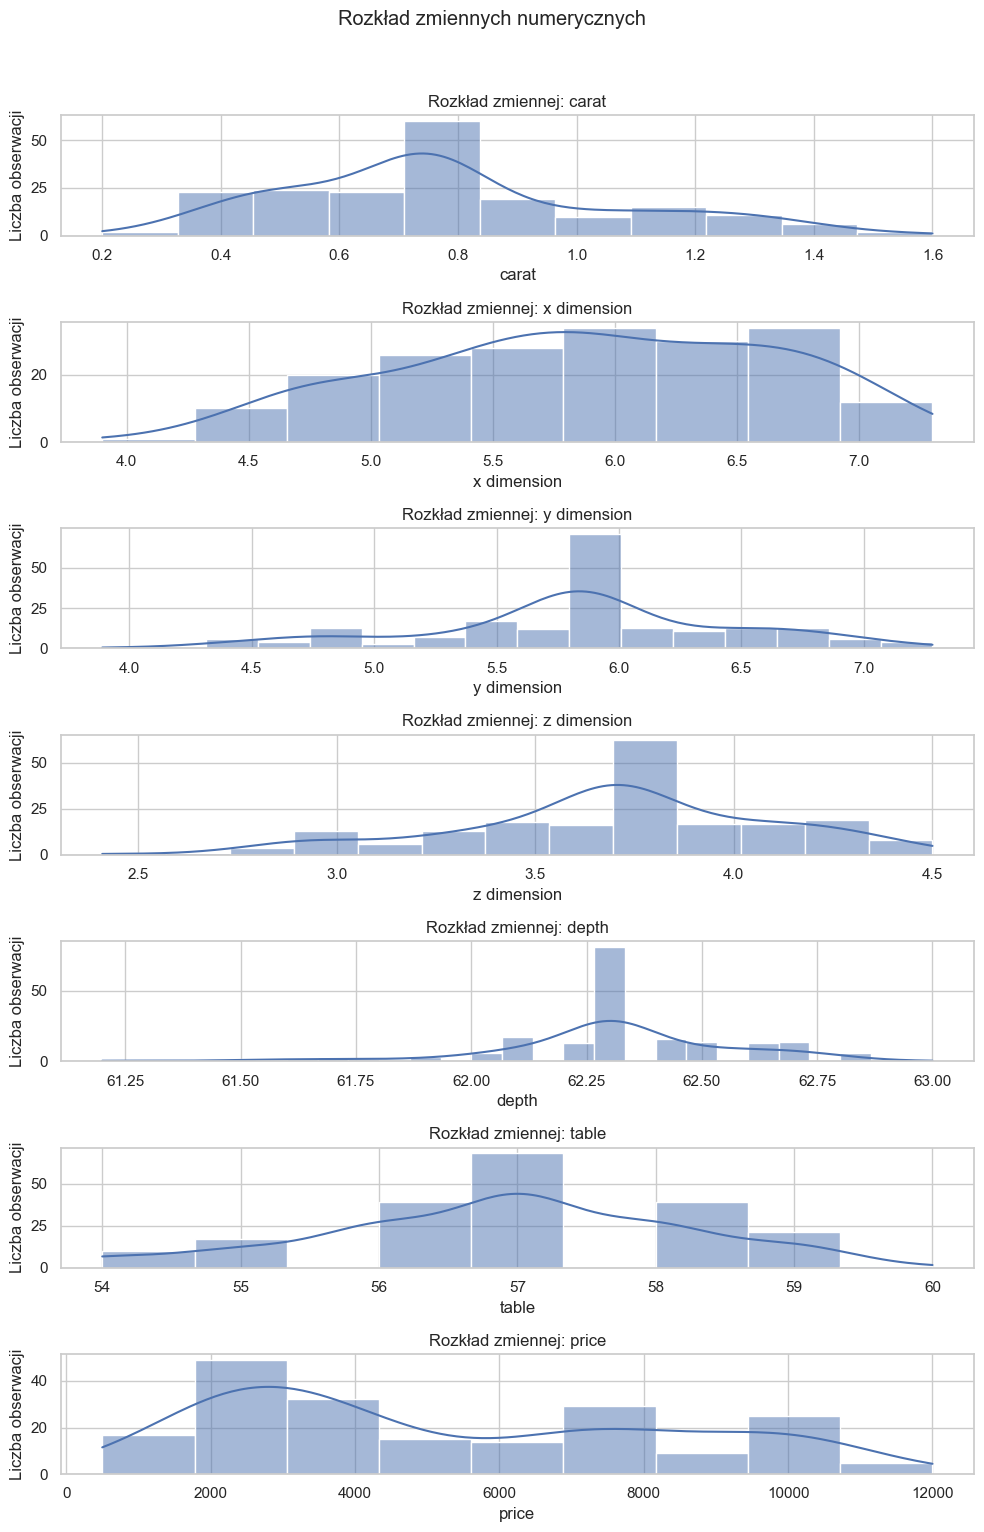

In [248]:
sns.set(style="whitegrid")

numeric_columns = ['carat', 'x dimension', 'y dimension', 'z dimension', 'depth', 'table', 'price']
fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(10, 15))

for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Rozkład zmiennej: {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Liczba obserwacji')
plt.suptitle('Rozkład zmiennych numerycznych', y=1.02)
plt.tight_layout()


/Users/michalokreglicki/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



Text(0.5, 1.02, 'Zależności ceny od innych zmiennych numerycznych')

<Figure size 1200x600 with 0 Axes>

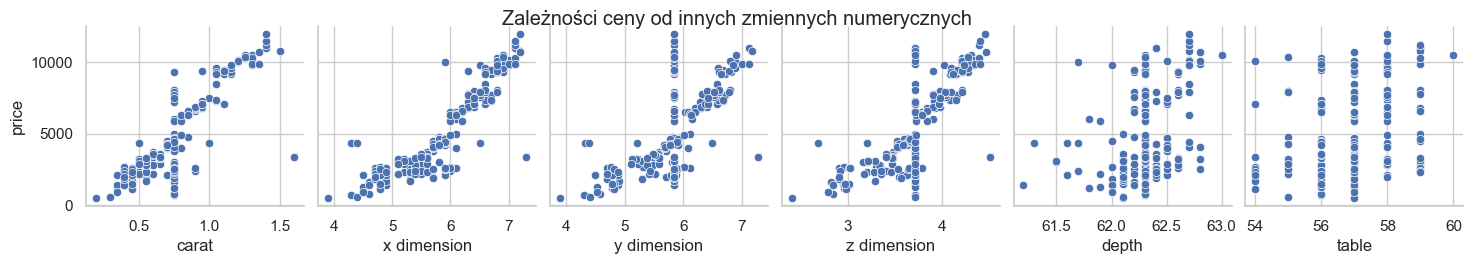

In [249]:
plt.figure(figsize=(12, 6))
sns.pairplot(df, x_vars=numeric_columns[:-1], y_vars=['price'], kind='scatter')
plt.suptitle('Zależności ceny od innych zmiennych numerycznych', y=1.02)

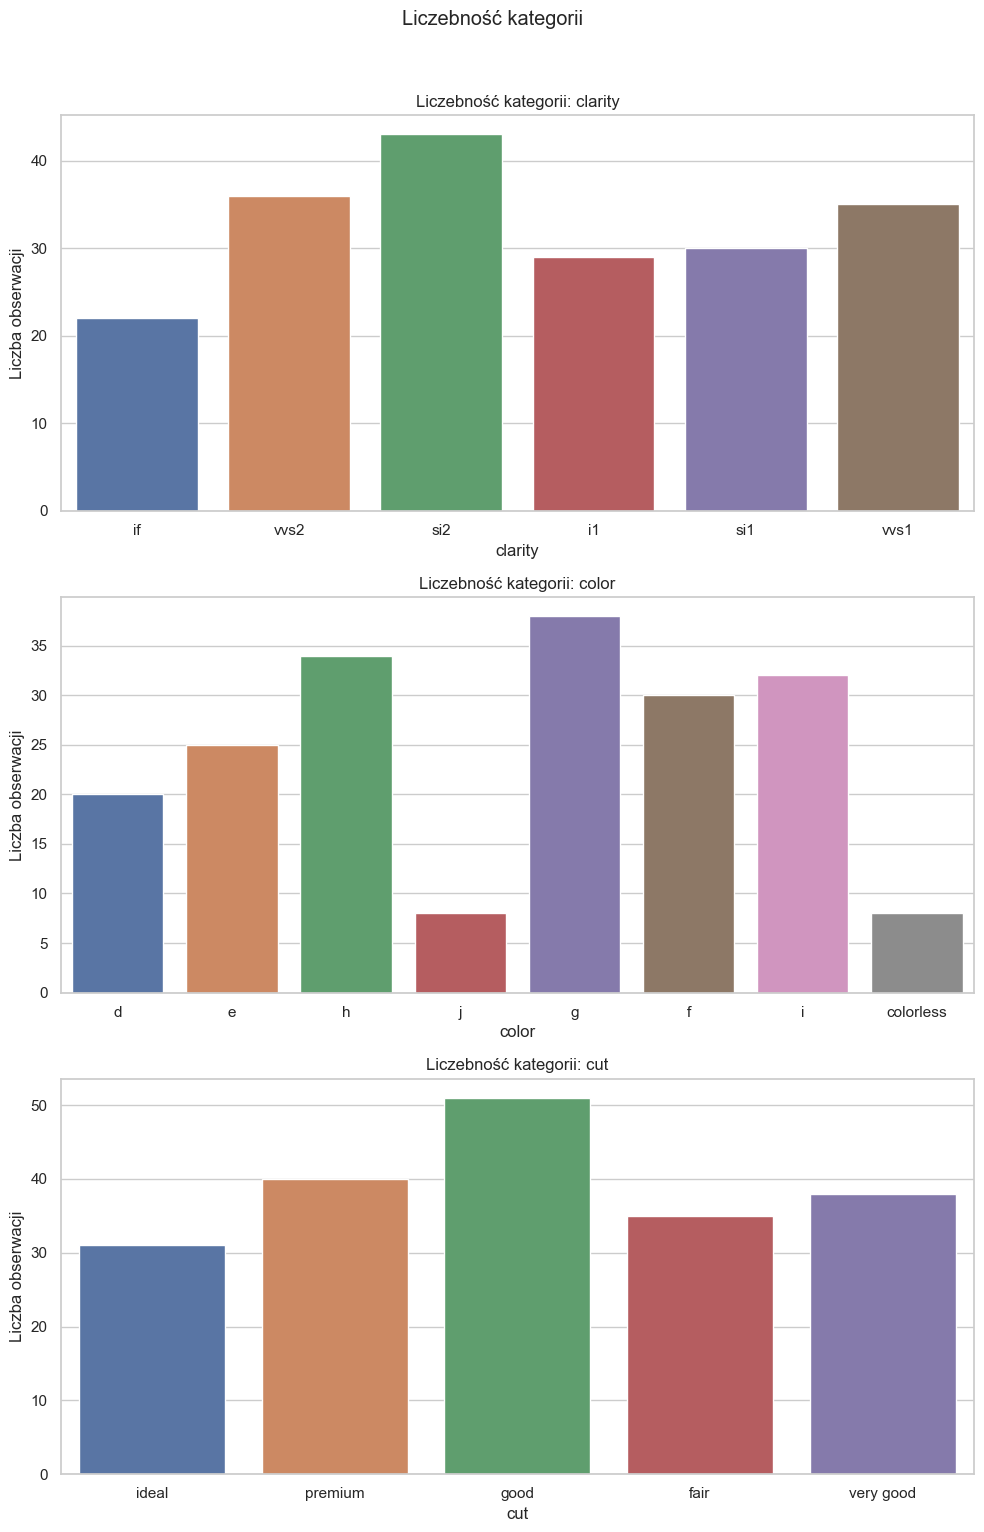

In [250]:
categorical_columns = ['clarity', 'color', 'cut']
fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(10, 15))

for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Liczebność kategorii: {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Liczba obserwacji')

plt.suptitle('Liczebność kategorii', y=1.02)
plt.tight_layout()
plt.show()
before_categorical_to_numeric = df.copy()


Przygotowanie danych

Zakodowanie zmiennych kategorycznych

In [251]:
le = LabelEncoder()
df['clarity'] = le.fit_transform(df['clarity'] )
df['color'] = le.fit_transform(df['color'] )
df['cut'] = le.fit_transform(df['cut'] )
df.head()

,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
0,0.50,1,1,2,5.1,5.15,3.200,61.5,57.0,3000.0
1,0.70,5,2,3,5.7,5.85,3.520,62.0,59.0,4500.0
2,0.75,3,5,1,4.3,4.31,3.715,62.3,56.0,700.0
3,1.20,1,1,2,5.9,6.82,4.200,61.7,58.0,10000.0
4,0.90,0,7,0,6.0,5.85,3.700,61.7,57.0,2400.0


Podział danych na zestaw treningowy i testowy

In [252]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Budowa modelu regresji liniowej

In [253]:

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R-squared: {r2}")



MSE: 1955194.8702639272
R-squared: 0.7776109703670107


Istotne zmienne w modelu

In [254]:
X_train_sm = sm.add_constant(X_train)

model_sm = sm.OLS(y_train, X_train_sm.astype(float)).fit()
selected_variables = model_sm.pvalues[model_sm.pvalues < 0.05].index.tolist()

selected_variables

['carat', 'clarity', 'cut', 'x dimension', 'z dimension', 'table']

Wizualizacja przewidywanych wartości w stosunku do rzeczywistych wartości

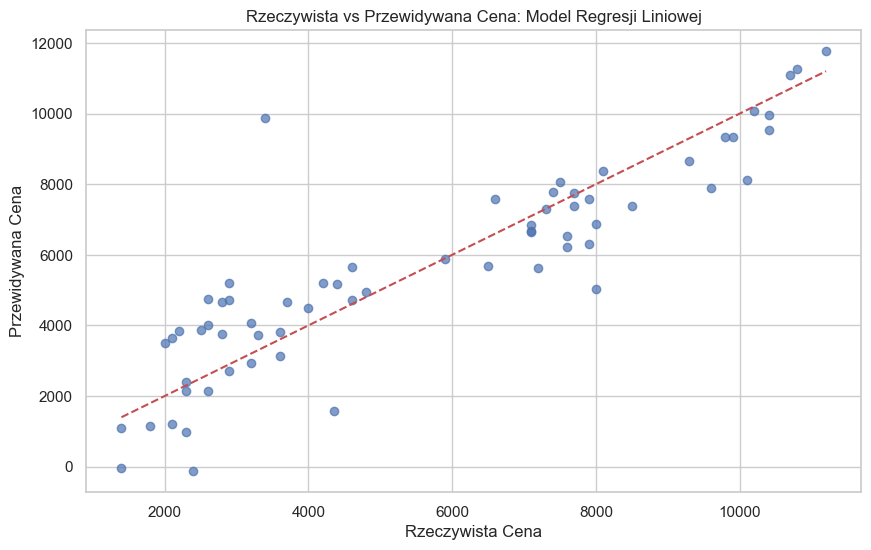

In [255]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Rzeczywista Cena')
plt.ylabel('Przewidywana Cena')
plt.title('Rzeczywista vs Przewidywana Cena: Model Regresji Liniowej')
plt.show()

Wpływ zmienny na cenę

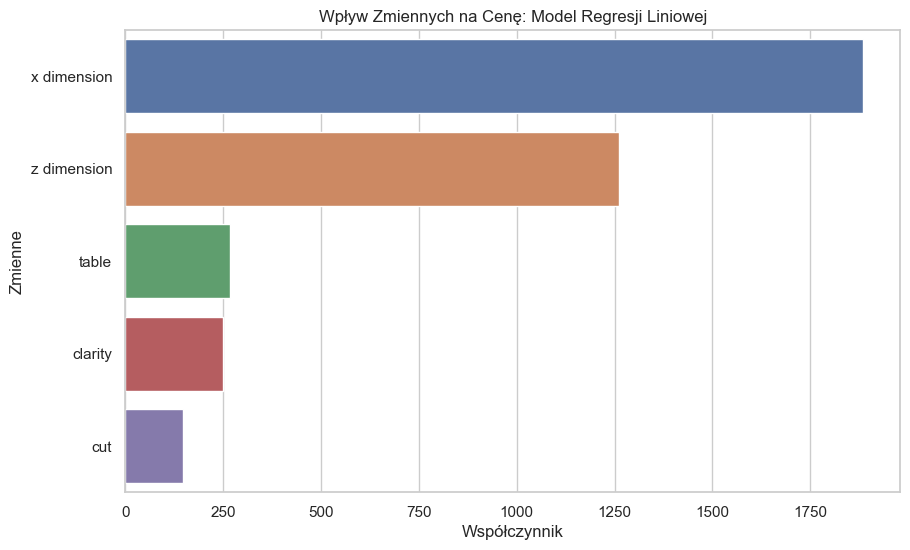

In [256]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients = coefficients.loc[selected_variables[1:]]
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients.Coefficient, y=coefficients.index)
plt.xlabel('Współczynnik')
plt.ylabel('Zmienne')
plt.title('Wpływ Zmiennych na Cenę: Model Regresji Liniowej')
plt.show()


Dashboard

http://127.0.0.1:8050/

In [264]:
app = dash.Dash(__name__)

numeric_columns = ['x dimension', 'y dimension', 'z dimension', 'depth', 'table']
categorical_columns = ['clarity', 'color', 'cut']

app.layout = html.Div([
    html.H1("Analiza Danych Diamentów"),
    
    html.H2("Rozkład zmiennych numerycznych"),
    dcc.Dropdown(
        id='variable-selector',
        options=[{'label': col, 'value': col} for col in numeric_columns],
        value=numeric_columns[0]
    ),
    dcc.Graph(id='distribution-graph'),
    
    html.H2("Analiza Zależności od Ceny"),
    dcc.Dropdown(
        id='variable-selector2',
        options=[{'label': column, 'value': column} for column in numeric_columns],
        value=numeric_columns[0] 
    ),
    dcc.Graph(id='price-dependency-graph'),
    
    html.H2("Liczebność zmiennych kategorycznych"),
    dcc.Dropdown(
        id='variable-selector3',
        options=[{'label': col, 'value': col} for col in categorical_columns],
        value=categorical_columns[0] 
    ),
    dcc.Graph(id='category-count-graph'),

    html.H2("Rzeczywista vs Przewidywana Cena: Model Regresji Liniowej"),
    dcc.Graph(id='actual-vs-predicted-graph'),
    html.H2("Wpływ zmiennych na cenę"),
    dcc.Graph(id='coefficients-graph'),
    
    
    html.H2("Próbka Danych"),
    dash_table.DataTable(
        data=df.sample(10).to_dict('records'),
        columns=[{'name': i, 'id': i} for i in df.columns]
    )
])

@app.callback(
    Output('distribution-graph', 'figure'),
    [Input('variable-selector', 'value')]
)
def update_distribution_graph(selected_variable):
    figure = ff.create_distplot([df[selected_variable].dropna()], [selected_variable], show_hist=True, show_rug=False)
    figure.update_layout(title=f'Rozkład zmiennej: {selected_variable}', xaxis_title=selected_variable, yaxis_title='Gęstość')
    return figure

@app.callback(
    Output('price-dependency-graph', 'figure'),
    [Input('variable-selector2', 'value')]
)
def update_graph(selected_variable):
    return px.scatter(df, x=selected_variable, y='price', trendline='ols',
                     labels={'price': 'Cena', selected_variable: selected_variable})

@app.callback(
    Output('category-count-graph', 'figure'),
    [Input('variable-selector3', 'value')]
)
def update_category_count_graph(selected_variable):
    data_grouped = before_categorical_to_numeric[selected_variable].value_counts().reset_index()
    data_grouped.columns = [selected_variable, 'count']
    data_grouped = data_grouped.sort_values(by='count', ascending=False)
    
    figure = px.bar(data_grouped, x=selected_variable, y='count', text='count')
    figure.update_traces(texttemplate='%{text}', textposition='outside')
    figure.update_layout(title=f'Liczebność kategorii: {selected_variable}',
                      xaxis_title=selected_variable,
                      yaxis_title='Liczba obserwacji')
    
    figure.update_xaxes(title_text=selected_variable)
    figure.update_yaxes(title_text="Liczba obserwacji")
    
    return figure

@app.callback(
    Output('actual-vs-predicted-graph', 'figure'),
    [Input('actual-vs-predicted-graph', 'id')] 
)
def update_actual_vs_predicted_graph(_):
    figure = go.Figure()
    figure.add_trace(go.Scatter(x=y_test, y=y_pred, mode='markers', name='Przewidywane'))
    figure.add_trace(go.Scatter(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], mode='lines', name='Idealna zgodność', line=dict(color='red', dash='dash')))
    figure.update_layout(title='Rzeczywista vs Przewidywana Cena: Model Regresji Liniowej',
                      xaxis_title='Rzeczywista Cena',
                      yaxis_title='Przewidywana Cena')
    return figure

@app.callback(
    Output('coefficients-graph', 'figure'),
    [Input('coefficients-graph', 'id')] 
)
def update_coefficients_graph(_):
    figure = go.Figure(go.Bar(
        x=coefficients['Coefficient'],
        y=coefficients.index,
        orientation='h'
    ))
    figure.update_layout(title='Wpływ Zmiennych na Cenę: Model Regresji Liniowej',
                      xaxis_title='Współczynnik',
                      yaxis_title='Zmienne')
    return figure

if __name__ == '__main__':
    app.run_server(debug=True)
